In [13]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

In [14]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Machine learning algorithms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [16]:
# Preprocessing
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import ADASYN
from tqdm import tqdm

In [17]:
# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [18]:
# Deep learning
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from collections import Counter as ctr

In [19]:
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("dark")
# plt.rcParams['figure.figsize'] = (10, 6)
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [20]:
df = pd.read_csv('./sample_data/asthma_disease_data.csv')

In [21]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'PollutionExposure', 'PollenExposure', 'DustExposure', 'PetAllergy',
       'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever',
       'GastroesophagealReflux', 'LungFunctionFEV1', 'LungFunctionFVC',
       'Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing',
       'NighttimeSymptoms', 'ExerciseInduced', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [22]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [23]:
df.tail()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
2387,7421,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,...,3.125249,5.166032,0,1,0,0,0,1,1,Dr_Confid
2388,7422,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,...,1.132977,5.509502,0,0,0,1,1,0,1,Dr_Confid
2389,7423,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,...,1.685962,3.346877,1,0,1,1,0,1,1,Dr_Confid
2390,7424,46,1,0,2,23.444712,0,9.672637,7.362861,6.717272,...,3.481549,1.713274,0,1,1,0,1,1,0,Dr_Confid
2391,7425,26,1,0,0,28.123021,1,1.613138,7.412878,8.512253,...,2.280613,2.453284,1,1,0,0,1,0,0,Dr_Confid


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

In [25]:
df.dtypes

PatientID                   int64
Age                         int64
Gender                      int64
Ethnicity                   int64
EducationLevel              int64
BMI                       float64
Smoking                     int64
PhysicalActivity          float64
DietQuality               float64
SleepQuality              float64
PollutionExposure         float64
PollenExposure            float64
DustExposure              float64
PetAllergy                  int64
FamilyHistoryAsthma         int64
HistoryOfAllergies          int64
Eczema                      int64
HayFever                    int64
GastroesophagealReflux      int64
LungFunctionFEV1          float64
LungFunctionFVC           float64
Wheezing                    int64
ShortnessOfBreath           int64
ChestTightness              int64
Coughing                    int64
NighttimeSymptoms           int64
ExerciseInduced             int64
Diagnosis                   int64
DoctorInCharge             object
dtype: object

In [26]:
df.sample(10)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
202,5236,9,0,1,2,27.300931,0,9.888573,4.734875,9.934780,...,1.872827,3.264231,0,0,1,0,1,0,0,Dr_Confid
261,5295,10,0,3,2,25.656292,0,2.264090,0.069107,9.171241,...,3.261322,3.353903,0,1,0,0,1,1,0,Dr_Confid
336,5370,63,1,3,1,36.405527,0,0.787865,8.313008,6.343562,...,1.709599,4.502629,1,1,0,0,1,1,0,Dr_Confid
578,5612,51,1,0,0,23.237183,0,4.095671,6.069704,8.839622,...,2.300037,1.607681,1,1,1,1,0,1,0,Dr_Confid
2347,7381,36,0,0,1,23.325732,0,0.479013,6.938388,9.082157,...,2.110480,5.618942,1,1,1,1,0,1,1,Dr_Confid
361,5395,53,0,0,2,16.622609,0,6.728997,7.237431,9.838407,...,1.236650,2.364161,0,0,0,1,0,1,0,Dr_Confid
1194,6228,65,1,0,1,36.519977,0,1.597408,6.977228,8.930101,...,2.138345,5.069390,1,1,0,1,0,0,0,Dr_Confid
998,6032,56,0,0,1,27.119836,0,2.542396,1.689084,5.096853,...,3.312528,5.088221,1,0,0,0,1,0,0,Dr_Confid
599,5633,70,0,0,0,36.626153,1,0.525549,5.291649,4.693581,...,3.856944,5.900638,0,1,1,0,0,0,0,Dr_Confid
278,5312,62,1,0,2,37.529682,0,9.151373,0.539668,9.414474,...,2.149541,3.666472,1,1,0,1,1,1,0,Dr_Confid


In [27]:
df.isnull().sum()

PatientID                 0
Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
DoctorInCharge            0
dtype: int64

In [28]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,...,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,6229.500000,42.137960,0.493311,0.669732,1.307274,27.244877,0.141722,5.051786,5.022867,7.019012,...,0.158027,2.548564,3.741270,0.596154,0.500418,0.503344,0.503344,0.602425,0.604933,0.051839
std,690.655244,21.606655,0.500060,0.986120,0.898242,7.201628,0.348838,2.903574,2.909980,1.732475,...,0.364842,0.861809,1.303689,0.490770,0.500104,0.500093,0.500093,0.489499,0.488967,0.221749
min,5034.000000,5.000000,0.000000,0.000000,0.000000,15.031803,0.000000,0.001740,0.003031,4.001437,...,0.000000,1.000459,1.500045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5631.750000,23.000000,0.000000,0.000000,1.000000,20.968313,0.000000,2.578333,2.432043,5.498500,...,0.000000,1.824113,2.607489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6229.500000,42.000000,0.000000,0.000000,1.000000,27.052202,0.000000,5.016881,5.115383,6.975839,...,0.000000,2.553244,3.734982,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,6827.250000,61.000000,1.000000,1.000000,2.000000,33.555903,0.000000,7.540234,7.544216,8.526950,...,0.000000,3.292897,4.864121,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,7425.000000,79.000000,1.000000,3.000000,3.000000,39.985611,1.000000,9.995809,9.999904,9.996235,...,1.000000,3.999719,5.999421,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
df.drop('PatientID',axis=1, inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     2392 non-null   int64  
 1   Gender                  2392 non-null   int64  
 2   Ethnicity               2392 non-null   int64  
 3   EducationLevel          2392 non-null   int64  
 4   BMI                     2392 non-null   float64
 5   Smoking                 2392 non-null   int64  
 6   PhysicalActivity        2392 non-null   float64
 7   DietQuality             2392 non-null   float64
 8   SleepQuality            2392 non-null   float64
 9   PollutionExposure       2392 non-null   float64
 10  PollenExposure          2392 non-null   float64
 11  DustExposure            2392 non-null   float64
 12  PetAllergy              2392 non-null   int64  
 13  FamilyHistoryAsthma     2392 non-null   int64  
 14  HistoryOfAllergies      2392 non-null   

Text(0.5, 0, 'Age')

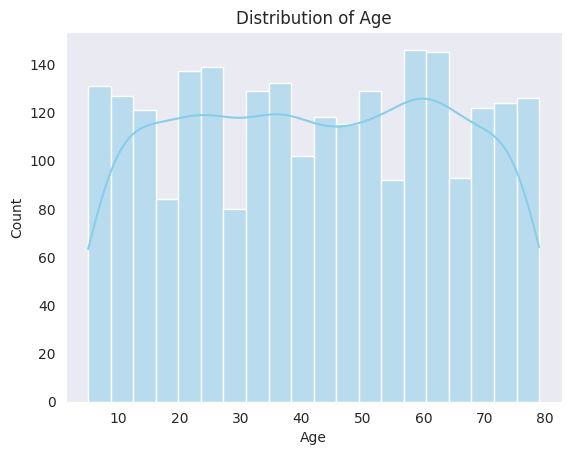

In [31]:
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')

Text(0.5, 1.0, 'Count of Gender')

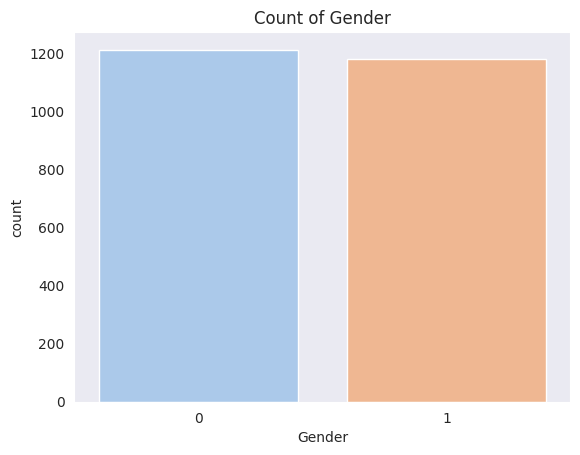

In [32]:
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Count of Gender')

Text(0.5, 1.0, 'Distribution of BMI')

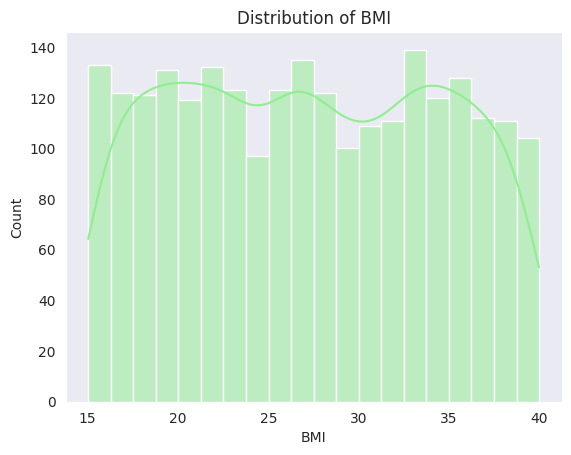

In [33]:
sns.histplot(df['BMI'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of BMI')

Text(0, 0.5, 'FEV1')

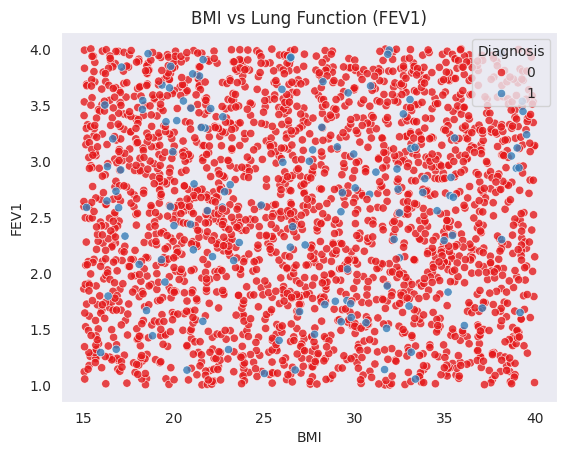

In [34]:
sns.scatterplot(x='BMI', y='LungFunctionFEV1', data=df, hue='Diagnosis', palette='Set1', alpha=0.8)
plt.title('BMI vs Lung Function (FEV1)')
plt.xlabel('BMI')
plt.ylabel('FEV1')

Text(0.5, 1.0, 'Ethnicity Distribution')

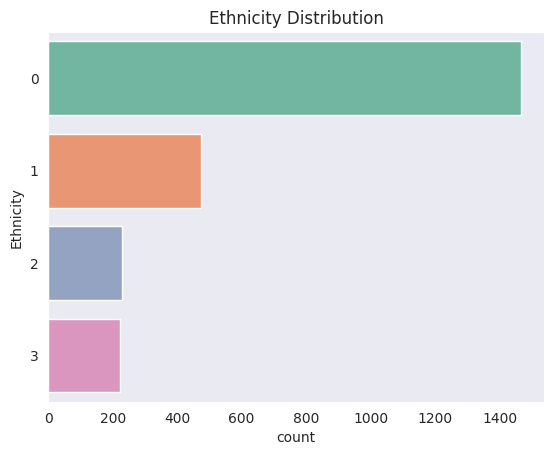

In [35]:
sns.countplot(y='Ethnicity', data=df, palette='Set2', order=df['Ethnicity'].value_counts().index)
plt.title('Ethnicity Distribution')

Text(0, 0.5, 'FEV1')

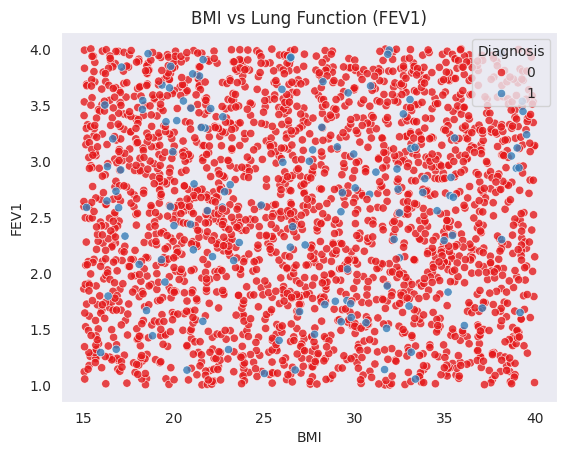

In [36]:
sns.scatterplot(x='BMI', y='LungFunctionFEV1', data=df, hue='Diagnosis', palette='Set1', alpha=0.8)
plt.title('BMI vs Lung Function (FEV1)')
plt.xlabel('BMI')
plt.ylabel('FEV1')

Text(0.5, 1.0, 'Age vs Smoking Status')

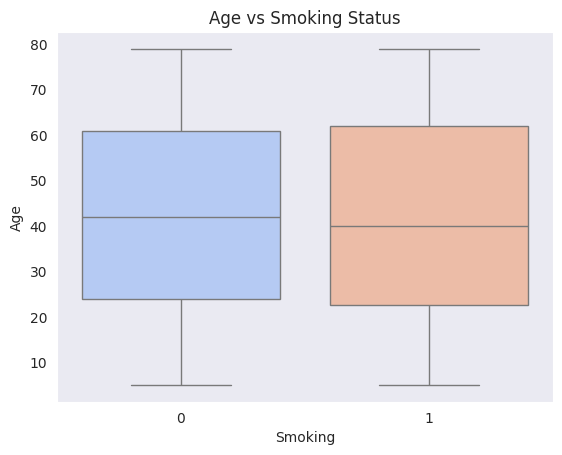

In [37]:
sns.boxplot(x='Smoking', y='Age', data=df, palette='coolwarm')
plt.title('Age vs Smoking Status')

Text(0.5, 1.0, 'Education Level Distribution')

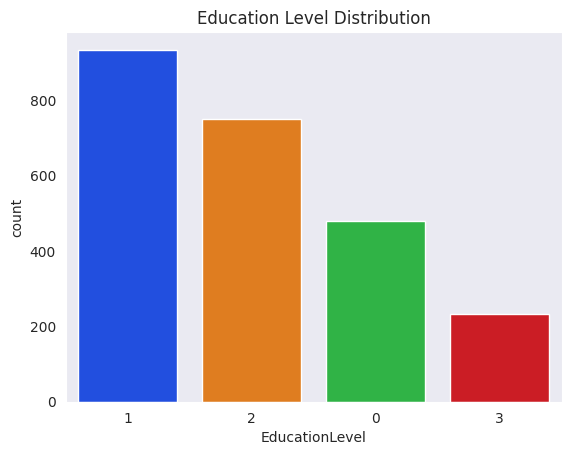

In [38]:
sns.countplot(x='EducationLevel', data=df, palette='bright', order=df['EducationLevel'].value_counts().index)
plt.title('Education Level Distribution')

Text(0.5, 1.0, 'Correlation Heatmap of Numerical Features')

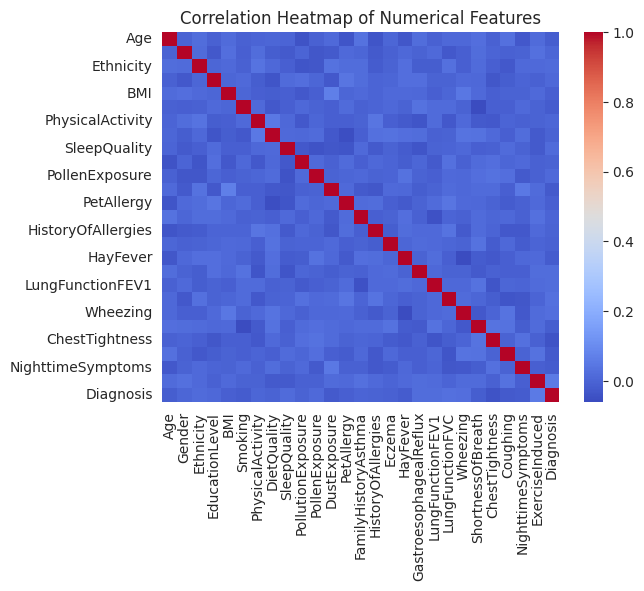

In [39]:
numerical_features = df.select_dtypes(exclude='object').columns
sns.heatmap(df[numerical_features].corr(), cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')

Text(0.5, 1.0, 'Family History of Asthma')

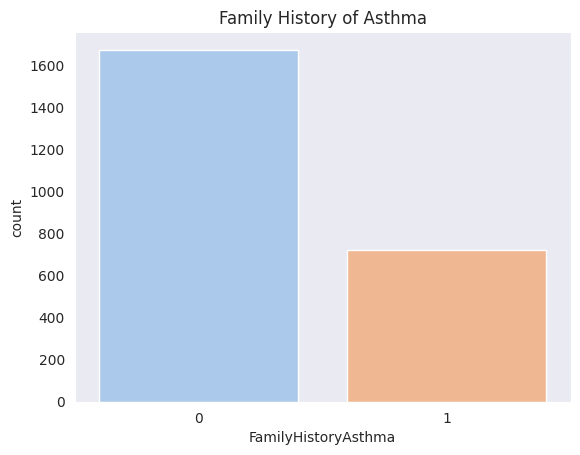

In [40]:
sns.countplot(x='FamilyHistoryAsthma', data=df, palette='pastel')
plt.title('Family History of Asthma')

Text(0, 0.5, 'Physical Activity')

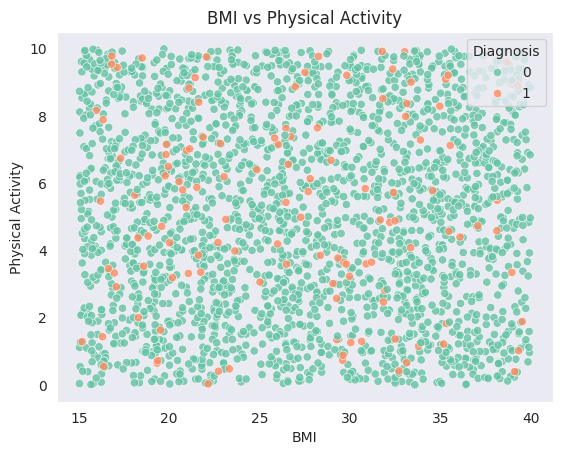

In [41]:
sns.scatterplot(x='BMI', y='PhysicalActivity', data=df, hue='Diagnosis', palette='Set2', alpha=0.8)
plt.title('BMI vs Physical Activity')
plt.xlabel('BMI')
plt.ylabel('Physical Activity')

Text(0.5, 1.0, 'Distribution of Lung Function (FVC)')

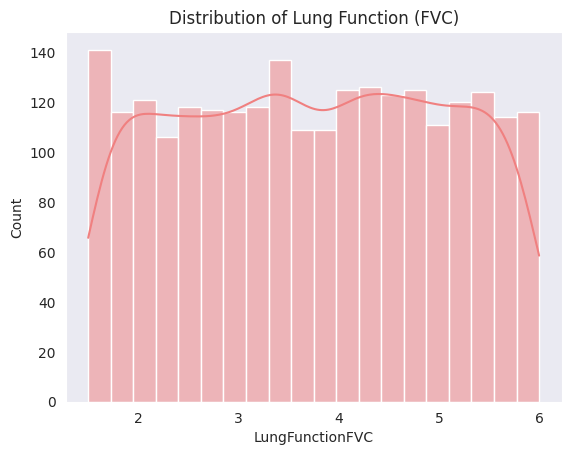

In [42]:
sns.histplot(df['LungFunctionFVC'], bins=20, kde=True, color='lightcoral')
plt.title('Distribution of Lung Function (FVC)')

Text(0.5, 1.0, 'Diagnosis Distribution')

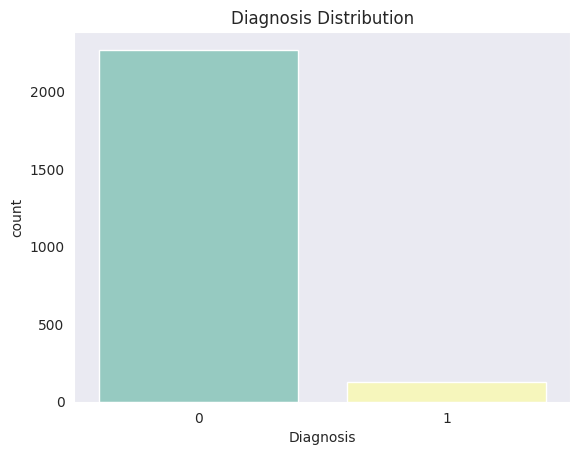

In [44]:
sns.countplot(x='Diagnosis', data=df, palette='Set3')
plt.title('Diagnosis Distribution')

Feature engineering

In [45]:
df.drop(['DoctorInCharge'],axis=1, inplace=True)

In [46]:
age_bins = [0, 12, 19, 60, 100]
age_labels = ['Child', 'Teen', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

In [47]:
bmi_bins = [0, 18.5, 24.9, 29.9, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['BMICategory'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels, right=False)

In [48]:
df['LifestyleScore'] = df[['PhysicalActivity', 'DietQuality', 'SleepQuality']].mean(axis=1)

In [49]:
df['AllergyScore'] = df[['PetAllergy', 'HistoryOfAllergies', 'Eczema', 'HayFever']].sum(axis=1)

In [50]:
df['ExposureScore'] = df[['PollutionExposure', 'PollenExposure', 'DustExposure']].mean(axis=1)

In [51]:
df['SymptomSeverityScore'] = df[['Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced']].sum(axis=1)

In [52]:
df['LungFunctionRatio'] = df['LungFunctionFEV1'] / df['LungFunctionFVC']

In [53]:
df.head(2)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,NighttimeSymptoms,ExerciseInduced,Diagnosis,AgeGroup,BMICategory,LifestyleScore,AllergyScore,ExposureScore,SymptomSeverityScore,LungFunctionRatio
0,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,...,0,1,0,Senior,Underweight,5.028049,1,3.739466,2,0.277068
1,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,...,1,1,0,Adult,Normal,5.797437,1,5.337378,4,1.290987


In [54]:
df.dtypes

Age                          int64
Gender                       int64
Ethnicity                    int64
EducationLevel               int64
BMI                        float64
Smoking                      int64
PhysicalActivity           float64
DietQuality                float64
SleepQuality               float64
PollutionExposure          float64
PollenExposure             float64
DustExposure               float64
PetAllergy                   int64
FamilyHistoryAsthma          int64
HistoryOfAllergies           int64
Eczema                       int64
HayFever                     int64
GastroesophagealReflux       int64
LungFunctionFEV1           float64
LungFunctionFVC            float64
Wheezing                     int64
ShortnessOfBreath            int64
ChestTightness               int64
Coughing                     int64
NighttimeSymptoms            int64
ExerciseInduced              int64
Diagnosis                    int64
AgeGroup                  category
BMICategory         

In [55]:
df['AgeGroup'] = df['AgeGroup'].astype('object')
df['BMICategory'] = df['BMICategory'].astype('object')

In [56]:
df.dtypes

Age                         int64
Gender                      int64
Ethnicity                   int64
EducationLevel              int64
BMI                       float64
Smoking                     int64
PhysicalActivity          float64
DietQuality               float64
SleepQuality              float64
PollutionExposure         float64
PollenExposure            float64
DustExposure              float64
PetAllergy                  int64
FamilyHistoryAsthma         int64
HistoryOfAllergies          int64
Eczema                      int64
HayFever                    int64
GastroesophagealReflux      int64
LungFunctionFEV1          float64
LungFunctionFVC           float64
Wheezing                    int64
ShortnessOfBreath           int64
ChestTightness              int64
Coughing                    int64
NighttimeSymptoms           int64
ExerciseInduced             int64
Diagnosis                   int64
AgeGroup                   object
BMICategory                object
LifestyleScore

In [57]:
le = LabelEncoder()

df['AgeGroup'] = le.fit_transform(df['AgeGroup'])
df['BMICategory'] = le.fit_transform(df['BMICategory'])

### Selecting top k features using SelectKBest

In [58]:
X = df.drop(['Diagnosis'], axis=1)
y = df['Diagnosis']
k = 15
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
df_selected = df[selected_features]
print("Selected Features:\n", selected_features)

Selected Features:
 Index(['Ethnicity', 'Smoking', 'SleepQuality', 'DustExposure', 'HayFever',
       'GastroesophagealReflux', 'LungFunctionFEV1', 'LungFunctionFVC',
       'Wheezing', 'ChestTightness', 'Coughing', 'NighttimeSymptoms',
       'ExerciseInduced', 'AgeGroup', 'AllergyScore'],
      dtype='object')


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [60]:
ctr(y_train)

Counter({0: 1812, 1: 101})

In [61]:
sm = ADASYN(random_state=42)

X_train, y_train = sm.fit_resample(X_train, y_train)

In [62]:
ctr(y_train)

Counter({0: 1812, 1: 1794})

In [63]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [64]:
svm_preds = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_preds)
print("Support Vector Machine (SVM) Accuracy:", svm_accuracy)
print("Classification Report:\n", classification_report(y_test, svm_preds))

Support Vector Machine (SVM) Accuracy: 0.6471816283924844
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.65      0.78       456
           1       0.07      0.52      0.12        23

    accuracy                           0.65       479
   macro avg       0.52      0.59      0.45       479
weighted avg       0.92      0.65      0.75       479



In [65]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [66]:
dt_preds = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_preds)
print("\nDecision Tree Accuracy:", dt_accuracy)
print("Classification Report:\n", classification_report(y_test, dt_preds))


Decision Tree Accuracy: 0.9039665970772442
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       456
           1       0.07      0.09      0.08        23

    accuracy                           0.90       479
   macro avg       0.51      0.52      0.51       479
weighted avg       0.91      0.90      0.91       479



In [67]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [68]:
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
print("\nRandom Forest Accuracy:", rf_accuracy)
print("Classification Report:\n", classification_report(y_test, rf_preds))


Random Forest Accuracy: 0.9519832985386222
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       456
           1       0.00      0.00      0.00        23

    accuracy                           0.95       479
   macro avg       0.48      0.50      0.49       479
weighted avg       0.91      0.95      0.93       479



In [69]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [70]:
xgb_preds = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_preds)
print("\nXGBoost Accuracy:", xgb_accuracy)
print("Classification Report:\n", classification_report(y_test, xgb_preds))


XGBoost Accuracy: 0.9498956158663883
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       456
           1       0.33      0.04      0.08        23

    accuracy                           0.95       479
   macro avg       0.64      0.52      0.53       479
weighted avg       0.92      0.95      0.93       479



In [71]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='kd_tree')
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', weights='distance')

In [72]:
knn_preds = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_preds)
print("\nK-Nearest Neighbors (KNN) Accuracy:", knn_accuracy)
print("Classification Report:\n", classification_report(y_test, knn_preds))


K-Nearest Neighbors (KNN) Accuracy: 0.6743215031315241
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.69      0.80       456
           1       0.05      0.30      0.08        23

    accuracy                           0.67       479
   macro avg       0.50      0.50      0.44       479
weighted avg       0.91      0.67      0.77       479



## ANN WITH PYTOURCH

In [73]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [74]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes, dropout_prob=0.5):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_prob)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.fc2(out)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.fc3(out)
        return out

In [75]:
input_size = X_train.shape[1]
hidden_size1 = 128
hidden_size2 = 64
num_classes = 2
model = NeuralNet(input_size, hidden_size1, hidden_size2, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [76]:
num_epochs = 10000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1000/10000], Loss: 0.1019
Epoch [2000/10000], Loss: 0.0672
Epoch [3000/10000], Loss: 0.0474
Epoch [4000/10000], Loss: 0.0473
Epoch [5000/10000], Loss: 0.0424
Epoch [6000/10000], Loss: 0.0262
Epoch [7000/10000], Loss: 0.0322
Epoch [8000/10000], Loss: 0.0333
Epoch [9000/10000], Loss: 0.0279
Epoch [10000/10000], Loss: 0.0198


In [77]:
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    test_accuracy = accuracy_score(y_test_tensor.numpy(), predicted.numpy())
    print(f'\nTest Accuracy: {test_accuracy:.4f}')
    print('Classification Report:\n', classification_report(y_test_tensor.numpy(), predicted.numpy()))


Test Accuracy: 0.9499
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       456
           1       0.00      0.00      0.00        23

    accuracy                           0.95       479
   macro avg       0.48      0.50      0.49       479
weighted avg       0.91      0.95      0.93       479



In [78]:
X_train_np, X_test_np = np.array(X_train), np.array(X_test)
y_train_np, y_test_np = np.array(y_train), np.array(y_test)

In [79]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def backward(self, X, y, output):
        self.output_error = y - output
        self.output_delta = self.output_error * self.sigmoid_derivative(output)

        self.z2_error = self.output_delta.dot(self.W2.T)
        self.z2_delta = self.z2_error * self.sigmoid_derivative(self.a1)

        self.W1 += X.T.dot(self.z2_delta)
        self.b1 += np.sum(self.z2_delta, axis=0, keepdims=True)

        self.W2 += self.a1.T.dot(self.output_delta)
        self.b2 += np.sum(self.output_delta, axis=0, keepdims=True)

    def train(self, X, y, epochs):
        for epoch in tqdm(range(epochs), colour='blue'):
            output = self.forward(X)
            self.backward(X, y, output)

    def predict(self, X):
        return np.round(self.forward(X))

In [80]:
input_size = X_train_np.shape[1]
hidden_size = 128
output_size = 1

model = NeuralNetwork(input_size, hidden_size, output_size)
tqdm(model.train(X_train_np, y_train_np.reshape(-1, 1), epochs=100000))

100%|██████████| 100000/100000 [45:17<00:00, 36.80it/s]
0it [00:00, ?it/s]

In [81]:
predictions = model.predict(X_test_np)

accuracy = np.mean(predictions == y_test_np.reshape(-1, 1))
print(f"Accuracy: {accuracy * 100}%")

Accuracy: 4.801670146137787%


In [82]:
print('Classification Report:\n', classification_report(y_test_np.reshape(-1, 1), predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       456
           1       0.05      1.00      0.09        23

    accuracy                           0.05       479
   macro avg       0.02      0.50      0.05       479
weighted avg       0.00      0.05      0.00       479

